# ML on Workshop

# Modelo de regresion lineal

Entreno de modelo
Testeo de modelo (Sin terminar)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#Creacion de variables para el entreno y prueba del modelo
train= pd.read_csv('Daily Demand Forecasting Orders_Daily_Demand_Forecasting_Orders.csv')
test= pd.read_csv('Daily Demand Forecasting Orders_Daily_Demand_Forecasting_Orders.csv')

In [54]:
train.head()

,Week of the month (first week second third fourth or fifth week),Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [55]:
train.columns

Index(['Week of the month (first week second third fourth or fifth week)',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [56]:
train[['Week of the month (first week second third fourth or fifth week)', 'Target (Total orders)']].head()

,Week of the month (first week second third fourth or fifth week),Target (Total orders)
0,1,539.577
1,1,224.675
2,1,129.412
3,2,317.120
4,2,210.517


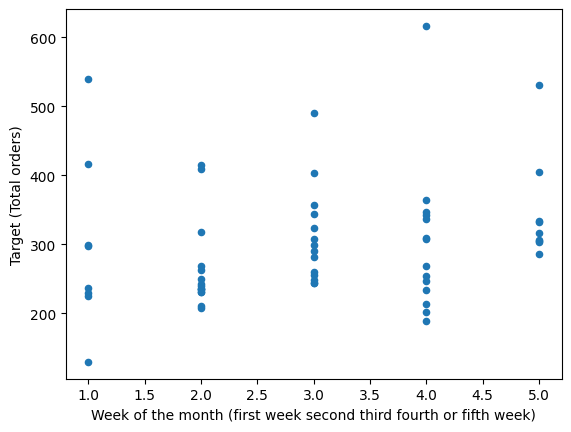

In [57]:
#Creacion de la grafica con eje x para las semanas del mes y eje y para el total de las ordenes
train.plot.scatter(x='Week of the month (first week second third fourth or fifth week)', y='Target (Total orders)')
plt.show()

In [58]:
#Minimo dato del eje x
train['Week of the month (first week second third fourth or fifth week)'].min()

1

In [59]:
#Datos de la recta
w= 25
b= 200

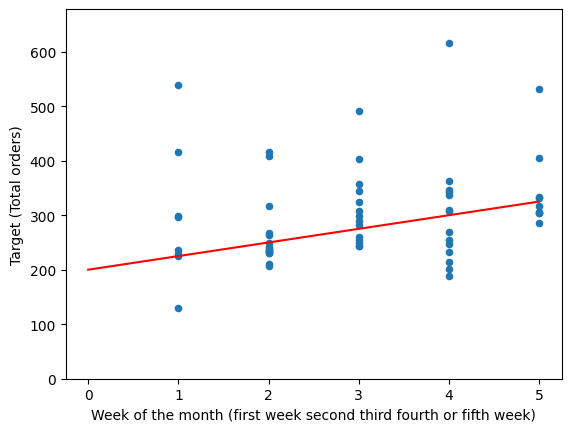

In [60]:
#Creacion de recta respecto a los puntos
x= np.linspace(0, train['Week of the month (first week second third fourth or fifth week)'].max(), 100)
y= w*x+b
#Creacion de la grafica tomando en cuenta la recta
train.plot.scatter(x='Week of the month (first week second third fourth or fifth week)', y='Target (Total orders)')
plt.plot(x, y, '-r')
plt.ylim(0, train['Target (Total orders)'].max()*1.1)

plt.show()

In [61]:
#Calculo de predicciones
train['Prediccion']= train['Week of the month (first week second third fourth or fifth week)']
#Calculo de la funcion de error
train['Diferencia']= train['Prediccion'] - train['Target (Total orders)']
train['Cuadrado']= train['Diferencia']**2
train.head()

,Week of the month (first week second third fourth or fifth week),Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),Prediccion,Diferencia,Cuadrado
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,1,-538.577,290065.184929
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,1,-223.675,50030.505625
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412,1,-128.412,16489.641744
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120,2,-315.120,99300.614400
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517,2,-208.517,43479.339289


In [62]:
train['Cuadrado'].mean()

96567.08612595002

In [63]:
#grid de la funcion basada en m, b=0
w= np.linspace(50, 200, 50)
grid_error= pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [64]:
def sum_error(w, train):
    b= 0
    train['Prediccion']= train['Week of the month (first week second third fourth or fifth week)']*w+b
    train['Diferencia']= train['Prediccion'] - train['Target (Total orders)']
    train['Cuadrado']= train['Diferencia']**2
    return(train['Cuadrado'].mean())

In [65]:
grid_error['Error']= grid_error['w'].apply(lambda x: sum_error(x, train=train))
grid_error.head()

,w,Error
0,50.000000,32056.127959
1,53.061224,29733.799252
2,56.122449,27612.324357
3,59.183673,25691.703272
4,62.244898,23971.935998


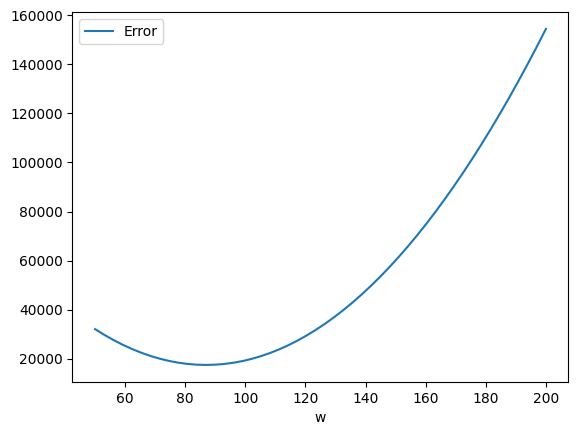

In [66]:
grid_error.plot(x='w', y='Error')
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression

#Definiendo los ejes
X_train= np.array(train['Week of the month (first week second third fourth or fifth week)']).reshape((-1, 1))
Y_train= np.array(train['Target (Total orders)'])
X_test= np.array(test['Week of the month (first week second third fourth or fifth week)']).reshape((-1, 1))
Y_test= np.array(test['Target (Total orders)'])

#Creando el modelo
model= LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

#Se imprimen parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Pendiente (w): {model.coef_}")

Intercepto (b): 0.0
Pendiente (w): [86.9253577]


In [68]:
from sklearn import metrics

#Sacando los valores de mae, rmse y r2
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [74]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#Imprime los datos de evaluacion para el entreno
print('Evaluacion del entreno:\n_____________________________________')
print_evaluate(Y_train, train_pred)

#Imprime los datos de evaluacion para el test(Sin resolver aun)
print('\nEvaluacion del test:\n_____________________________________')
print_evaluate(Y_test, test_pred)

Evaluacion del entreno:
_____________________________________
MAE: 100.86001570762053
RMSE: 132.07628635878896
R2 Square -1.2095973221304033

Evaluacion del test:
_____________________________________
MAE: 100.86001570762053
RMSE: 132.07628635878896
R2 Square -1.2095973221304033
